In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np
import requests as req 
import time
import json
from pprint import pprint 
from citipy import citipy

# Read Toy Reviews File and store into Pandas data frame
lego_df = pd.read_csv("data/lego_no_review_df.csv")
lego_df.head()

# Top 15 Lego Products and net present values file and store into Pandas data fram
present_value_df = pd.read_csv("data/intl_top_15.csv")
present_value_df

,Country,Product Title,Count,Year,Net Present Value
0,US,"LEGO 626 Green Building Plate (10"" x 10"") (Dis...",1056,2015,12.69
1,US,LEGO Ultimate Building Set - 405 Pieces (6166)...,813,2013,119.99
2,UK,LEGO Games 3844: Creationary,125,2013,25.93
3,US,LEGO Star Wars Death Star (10188) (Discontinue...,512,2015,449.00
4,US,"LEGO Blue Building Plate (10"" x 10"")",621,2013,18.99
5,US,LEGO Bricks & More Builders of Tomorrow Set 61...,787,2013,119.99
6,DE,LEGO Star Wars 8095 - General Grievous' Starf...,19,2011,51.26
7,FR,LEGO DUPLO - LEGOville - 5682 - Jouet Premier ...,44,2013,285.71
8,FR,LEGO - 7499 - City - Jeu de construction - Rai...,59,2012,22.74
9,DE,LEGO City 7499 - Flexible Schienen,75,2012,18.81


In [2]:
# Create new table
temp_lego_df = lego_df[["marketplace", "product_id", "product_title", "star_rating", "total_votes", "year"]]
temp_lego_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
0,US,B00EXJM3P4,LEGO The Hobbit Dol Guldur Battle 79014,5,0,2015
1,US,B0094J117O,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,0,2014
2,US,B00BG5FYY0,LEGO Hero Factory 44012 EVO Action Figure Playset,4,2,2014
3,US,B00A852QIG,LEGO DUPLO My First Construction Site 10518,5,0,2015
4,US,B00A8O87DA,LEGO LEGO Hero Factory BREEZ 44006,5,0,2014


In [3]:
# create new dataframes
temp_lego_df = temp_lego_df.loc[temp_lego_df["year"] >= 2013, :]
temp_lego_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
0,US,B00EXJM3P4,LEGO The Hobbit Dol Guldur Battle 79014,5,0,2015
1,US,B0094J117O,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,0,2014
2,US,B00BG5FYY0,LEGO Hero Factory 44012 EVO Action Figure Playset,4,2,2014
3,US,B00A852QIG,LEGO DUPLO My First Construction Site 10518,5,0,2015
4,US,B00A8O87DA,LEGO LEGO Hero Factory BREEZ 44006,5,0,2014


In [4]:
# New dataframe to exclude Japan
new_lego_df = temp_lego_df[temp_lego_df["marketplace"]!="JP"]
new_lego_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
0,US,B00EXJM3P4,LEGO The Hobbit Dol Guldur Battle 79014,5,0,2015
1,US,B0094J117O,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,0,2014
2,US,B00BG5FYY0,LEGO Hero Factory 44012 EVO Action Figure Playset,4,2,2014
3,US,B00A852QIG,LEGO DUPLO My First Construction Site 10518,5,0,2015
4,US,B00A8O87DA,LEGO LEGO Hero Factory BREEZ 44006,5,0,2014


In [5]:
total_legos = new_lego_df["product_id"].unique()
len(total_legos)

5325

In [6]:
# To sort from highest to lowest, ascending=False must be passed in
new_lego_df = new_lego_df.sort_values("year", ascending=False)
new_lego_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
0,US,B00EXJM3P4,LEGO The Hobbit Dol Guldur Battle 79014,5,0,2015
108394,US,B00A88E8NE,LEGO City Police ATV 60006,3,0,2015
108392,US,B00IANU4ZA,LEGO Superheroes Captain America vs. Hydra (76...,5,0,2015
108391,US,B00O4EKCDI,"LEGO, Snowman (40093)",5,0,2015
108390,US,B00JRCB3HQ,LEGO Ghostbusters Ecto-1 21108,5,1,2015


In [7]:
# New dataframe to segment the satisfaction by country by year
intl_2013_df = new_lego_df.loc[new_lego_df["year"] == 2013, :]
intl_2013_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
16490,US,B004WM1ZBK,LEGO Series 4 Collectible Minifigure The Monst...,2,2,2013
86545,US,B0062B1LH2,LEGO Bricks & More Police Building Set 4636,4,1,2013
72152,US,B00C0QS2ZW,LEGO City 60022 Cargo Terminal Toy Building Set,5,1,2013
85906,UK,B005WGIJLY,LEGO Super Heroes 6862: Superman vs. Power Arm...,5,0,2013
86548,US,B00ATX7IDU,LEGO Super Heroes Iron Man vs. The Mandarin Ul...,4,3,2013


In [8]:
intl_2013_df = intl_2013_df.groupby("marketplace")["star_rating"].mean()
intl_2013_df

marketplace
DE    4.785249
FR    4.571204
UK    4.691513
US    4.571825
Name: star_rating, dtype: float64

In [9]:
# Create an array that contains the average satisfaction rating for 2013 by each country
users = [4.79, 4.57, 4.69, 4.57]
x_axis = np.arange(len(users))

Text(0,0.5,'Average Satisfaction Based on 5-Star Ratings')

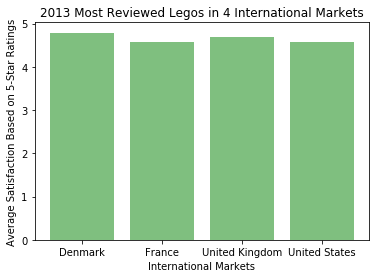

In [10]:
plt.bar(x_axis, users, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Denmark", "France", "United Kingdom", "United States"])
# Give our chart some labels and a tile
plt.title("2013 Most Reviewed Legos in 4 International Markets")
plt.xlabel("International Markets")
plt.ylabel("Average Satisfaction Based on 5-Star Ratings")

In [11]:
# New dataframe to segment the satisfaction by country by year
intl_2014_df = new_lego_df.loc[new_lego_df["year"] == 2014, :]
intl_2014_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
84988,US,B00GSPFC2M,LEGO Movie 70801 Melting Room,3,0,2014
84855,US,B00JRCB3HQ,LEGO Ghostbusters Ecto-1 21108,5,0,2014
142006,US,B007Q0OQF2,LEGO The Lord of the Rings Hobbit Gandalf Arri...,5,0,2014
84853,US,B00IGNXHOY,LEGO City Arctic Helicrane 60034 Building Toy ...,5,0,2014
84998,US,B004P95A0C,LEGO Harbor 4645,5,0,2014


In [12]:
intl_2014_df = intl_2014_df.groupby("marketplace")["star_rating"].mean()
intl_2014_df

marketplace
DE    4.681957
FR    4.570773
UK    4.703181
US    4.634877
Name: star_rating, dtype: float64

In [13]:
# Create an array that contains the average satisfaction rating for 2013 by each country
users = [4.68, 4.57, 4.70, 4.63]
x_axis = np.arange(len(users))

Text(0,0.5,'Average Satisfaction Based on 5-Star Ratings')

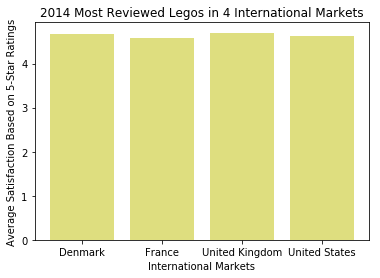

In [14]:
plt.bar(x_axis, users, color='y', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Denmark", "France", "United Kingdom", "United States"])
# Give our chart some labels and a tile
plt.title("2014 Most Reviewed Legos in 4 International Markets")
plt.xlabel("International Markets")
plt.ylabel("Average Satisfaction Based on 5-Star Ratings")

In [15]:
# New dataframe to segment the satisfaction by country by year
intl_2015_df = new_lego_df.loc[new_lego_df["year"] == 2015, :]
intl_2015_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
0,US,B00EXJM3P4,LEGO The Hobbit Dol Guldur Battle 79014,5,0,2015
108394,US,B00A88E8NE,LEGO City Police ATV 60006,3,0,2015
108392,US,B00IANU4ZA,LEGO Superheroes Captain America vs. Hydra (76...,5,0,2015
108391,US,B00O4EKCDI,"LEGO, Snowman (40093)",5,0,2015
108390,US,B00JRCB3HQ,LEGO Ghostbusters Ecto-1 21108,5,1,2015


In [16]:
# Create an array that contains the number of users each language has
users = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))

In [17]:
intl_2015_df = intl_2015_df.groupby("marketplace")["star_rating"].mean()
intl_2015_df

marketplace
DE    4.690476
FR    4.533170
UK    4.758016
US    4.702611
Name: star_rating, dtype: float64

In [18]:
# Create an array that contains the average satisfaction rating for 2013 by each country
users = [4.69, 4.53, 4.75, 4.70]
x_axis = np.arange(len(users))

Text(0,0.5,'Average Satisfaction Based on 5-Star Ratings')

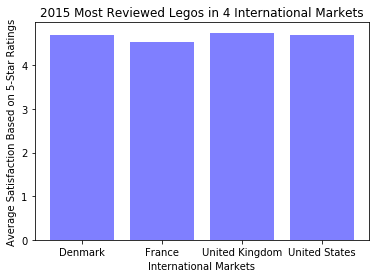

In [19]:
plt.bar(x_axis, users, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Denmark", "France", "United Kingdom", "United States"])
# Give our chart some labels and a tile
plt.title("2015 Most Reviewed Legos in 4 International Markets")
plt.xlabel("International Markets")
plt.ylabel("Average Satisfaction Based on 5-Star Ratings")

In [20]:
us_df = new_lego_df[new_lego_df["marketplace"] == "US"]
us_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
0,US,B00EXJM3P4,LEGO The Hobbit Dol Guldur Battle 79014,5,0,2015
108394,US,B00A88E8NE,LEGO City Police ATV 60006,3,0,2015
108392,US,B00IANU4ZA,LEGO Superheroes Captain America vs. Hydra (76...,5,0,2015
108391,US,B00O4EKCDI,"LEGO, Snowman (40093)",5,0,2015
108390,US,B00JRCB3HQ,LEGO Ghostbusters Ecto-1 21108,5,1,2015


In [21]:
us_title_group = us_df.groupby(['product_title'])['product_title'].count()
us_title_group_df = pd.DataFrame({'Product Title':us_title_group.index, 'Count':us_title_group.values})
us_title_group_df = us_title_group_df.sort_values(by='Count',ascending=False)
us_title_group_df.head(15)

,Product Title,Count
2756,"LEGO Minecraft, Micro World 21102 (Discontinue...",2138
4596,LEGO The DeLorean Time Machine Building Set 21...,1814
2735,LEGO Minecraft Micro World The Village 21105 (...,1446
2750,LEGO Minecraft The Nether 21106,1360
111,"LEGO 626 Green Building Plate (10"" x 10"") (Dis...",1056
1989,LEGO Ghostbusters Ecto-1 21108,1046
4734,LEGO Ultimate Building Set - 405 Pieces (6166)...,813
503,LEGO Bricks & More Builders of Tomorrow Set 61...,787
1259,LEGO Creator Volkswagen T1 Camper Van 10220 (D...,670
1810,LEGO Friends Dolphin Cruiser Building Set 4101...,641


In [22]:
# Consolidate the legos values under the product titles based by country
us_title_group = us_df.groupby(['product_title'])['product_title'].count()
us_title_group_df = pd.DataFrame({'Product Title':us_title_group.index, 'Count':us_title_group.values})
us_title_group_df = us_title_group_df.sort_values(by='Count',ascending=False)
us_title_group_df = us_title_group_df.reset_index(drop=True)
us_title_group_df2 = us_title_group_df.head(15)

us_title_group_df2

,Product Title,Count
0,"LEGO Minecraft, Micro World 21102 (Discontinue...",2138
1,LEGO The DeLorean Time Machine Building Set 21...,1814
2,LEGO Minecraft Micro World The Village 21105 (...,1446
3,LEGO Minecraft The Nether 21106,1360
4,"LEGO 626 Green Building Plate (10"" x 10"") (Dis...",1056
5,LEGO Ghostbusters Ecto-1 21108,1046
6,LEGO Ultimate Building Set - 405 Pieces (6166)...,813
7,LEGO Bricks & More Builders of Tomorrow Set 61...,787
8,LEGO Creator Volkswagen T1 Camper Van 10220 (D...,670
9,LEGO Friends Dolphin Cruiser Building Set 4101...,641


In [23]:
de_df = new_lego_df[new_lego_df["marketplace"] == "DE"]
de_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
107971,DE,B00H4908ZM,LEGO Technic 42030 - VOLVO L350F Radlader,1,30,2015
48243,DE,B004OT2WKO,LEGO Technic 8110 - Unimog U400,5,0,2015
48112,DE,B005XDHNF4,LEGO Minifiguren 853340 Hochzeits-Set Tischdek...,5,0,2015
47566,DE,B004OT2WKO,LEGO Technic 8110 - Unimog U400,5,0,2015
47338,DE,B00SDTX62E,LEGO Marvel Super Heroes 76036 - Marvel Super ...,5,2,2015


In [24]:
# Consolidate the legos values under the product titles based by country
de_popular_group = de_df.groupby(['product_title'])['product_title'].count()
de_popular_group_df = pd.DataFrame({'Product Title':de_popular_group.index, 'Count':de_popular_group.values})
de_popular_group_df = de_popular_group_df.sort_values(by='Count',ascending=False)
de_popular_group_df = de_popular_group_df.reset_index(drop=True)
de_popular_group_df2 = de_popular_group_df.head(15)


de_popular_group_df2

,Product Title,Count
0,LEGO Technic 8110 - Unimog U400,139
1,LEGO Creator 10220 - Volkswagen T1 Campingbus,128
2,LEGO Technic 42030 - VOLVO L350F Radlader,79
3,LEGO DUPLO 10505 - Familienhaus,77
4,LEGO City 7499 - Flexible Schienen,75
5,LEGO Technic 8070 - Super Car,71
6,LEGO 9496 - Star Wars Desert Skiff,35
7,LEGO Friends 41006 - Heartlake Bäckerei,28
8,LEGO 21103 zurück in die zukunft – Der Delorea...,25
9,LEGO Minifiguren 853340 Hochzeits-Set Tischdek...,24


In [25]:
uk_df = new_lego_df[new_lego_df["marketplace"] == "UK"]
uk_df.head(5)

,marketplace,product_id,product_title,star_rating,total_votes,year
46688,UK,B00HNSRYYM,LEGO Star Wars 75055: Imperial Star Destroyer,5,0,2015
46689,UK,B000BVMAJ2,LEGO DUPLO 4962: Baby Zoo,4,0,2015
108403,UK,B00B06V6Y2,LEGO Friends 41015 Dolphin Cruiser,5,0,2015
108402,UK,B0094J5DD2,LEGO Friends 41007: Heartlake Pet Salon,5,0,2015
108359,UK,B00GWG763U,LEGO 10681 Creative Building Cube,4,0,2015


In [26]:
# Consolidate the legos values under the product titles based by country
uk_title_group = uk_df.groupby(['product_title'])['product_title'].count()
uk_title_group_df = pd.DataFrame({'Product Title':uk_title_group.index, 'Count':uk_title_group.values})
uk_title_group_df = uk_title_group_df.sort_values(by='Count',ascending=False)
uk_title_group_df = uk_title_group_df.reset_index(drop=True)
uk_title_group_df2 = uk_title_group_df.head(15)


uk_title_group_df2

,Product Title,Count
0,LEGO Star Wars 75056 LEGO Star Wars Advent Cal...,243
1,LEGO City 60063 LEGO City Advent Calendar,215
2,LEGO Technic 42002: Hovercraft,161
3,LEGO Friends 41015 Dolphin Cruiser,160
4,LEGO Friends 3315: Olivia's House,159
5,LEGO Friends 41008: Heartlake City Pool,153
6,LEGO Star Wars 75023: Advent Calendar 2013,137
7,LEGO Games 3844: Creationary,125
8,LEGO Star Wars 7965: Millennium Falcon,125
9,LEGO Star Wars 9493: X-Wing Starfighter,120


In [27]:
fr_df = new_lego_df[new_lego_df["marketplace"] == "FR"]
fr_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
46686,FR,B00F3B35KS,LEGO Friends - 41037 - Jeu De Construction - L...,4,0,2015
46630,FR,B00B0ICYP0,LEGO the Lord of the Ring - 79008 - Jeu de Con...,5,0,2015
108223,FR,B00F3B3N6O,LEGO Ninjago - Playthèmes - 70724 - Jeu De Con...,4,1,2015
108662,FR,B005KISH7U,LEGO Star Wars - 9493 - Jeu de Construction - ...,5,0,2015
108571,FR,B00F3B3EHW,LEGO Movie - 70800 - Jeu De Construction - L'é...,5,0,2015


In [28]:
# Consolidate the legos values under the product titles based by country
fr_title_group = fr_df.groupby(['product_title'])['product_title'].count()
fr_title_group_df = pd.DataFrame({'Product Title':fr_title_group.index, 'Count':fr_title_group.values})
fr_title_group_df = fr_title_group_df.sort_values(by='Count',ascending=False)
fr_title_group_df = fr_title_group_df.reset_index(drop=True)
fr_title_group_df2 = fr_title_group_df.head(15)

fr_title_group_df2

,Product Title,Count
0,LEGO Star Wars - 7965 - Jeu de Construction - ...,125
1,LEGO Star Wars - 9493 - Jeu de Construction - ...,91
2,LEGO Friends - 41015 - Jeu de Construction - L...,81
3,LEGO Star Wars - 75023 - Calendriers de l'aven...,76
4,LEGO Friends - 3315 - Jeu de Construction - La...,70
5,LEGO Technic - 9398 - Jeu de Construction - Le...,64
6,LEGO - 7499 - City - Jeu de construction - Rai...,59
7,LEGO Technic - 9397 - Jeu de Construction - Le...,56
8,LEGO Creator - 10220 - Jeu de Construction - L...,56
9,LEGO Friends - 41008 - Jeu de Construction - L...,53


In [29]:
present_value_df.head()

,Country,Product Title,Count,Year,Net Present Value
0,US,"LEGO 626 Green Building Plate (10"" x 10"") (Dis...",1056,2015,12.69
1,US,LEGO Ultimate Building Set - 405 Pieces (6166)...,813,2013,119.99
2,UK,LEGO Games 3844: Creationary,125,2013,25.93
3,US,LEGO Star Wars Death Star (10188) (Discontinue...,512,2015,449.00
4,US,"LEGO Blue Building Plate (10"" x 10"")",621,2013,18.99


In [30]:
# create new dataframes
us_most_popular_df = present_value_df[present_value_df["Country"] == "US"]
us_most_popular_df
de_most_popular_df = present_value_df[present_value_df["Country"] == "DE"]
de_most_popular_df
fr_most_popular_df = present_value_df[present_value_df["Country"] == "FR"]
fr_most_popular_df
uk_most_popular_df = present_value_df[present_value_df["Country"] == "UK"]
uk_most_popular_df

,Country,Product Title,Count,Year,Net Present Value
2,UK,LEGO Games 3844: Creationary,125,2013,25.93
10,UK,LEGO City 7499: Flexible Tracks,112,2015,21.41
15,UK,LEGO Star Wars 7965: Millennium Falcon,125,2013,34.89
20,UK,LEGO Friends 3315: Olivia's House,159,2013,194.12
23,UK,LEGO Star Wars 9493: X-Wing Starfighter,120,2014,246.30
27,UK,LEGO Friends 3186: Emma's Horse Trailer,101,2014,64.84
33,UK,LEGO Technic 42002: Hovercraft,161,2014,29.82
35,UK,LEGO Friends 41007: Heartlake Pet Salon,112,2013,58.34
36,UK,LEGO Friends 41008: Heartlake City Pool,153,2013,64.79
41,UK,LEGO Creator 31010: Treehouse,99,2014,51.88


In [31]:
# Create the Dataframes for the X - axis - the top 15 lego items by country
most_popular = present_value_df.groupby(['Country'])['Count'].count()
most_popular_us = us_most_popular_df.groupby(['Product Title'])['Count'].count()
most_popular_de = de_most_popular_df.groupby(['Product Title'])['Count'].count()
most_popular_fr = fr_most_popular_df.groupby(['Product Title'])['Count'].count()
most_popular_uk = uk_most_popular_df.groupby(['Product Title'])['Count'].count()
most_popular.head()

Country
DE    15
FR    15
UK    15
US    15
Name: Count, dtype: int64

In [32]:
## Cost variance by country 
unit_cost = present_value_df.groupby(['Product Title'])['Net Present Value'].sum()
unit_cost_us = us_most_popular_df.groupby(['Product Title'])['Net Present Value'].sum()
unit_cost_de = de_most_popular_df.groupby(['Product Title'])['Net Present Value'].sum()
unit_cost_fr = fr_most_popular_df.groupby(['Product Title'])['Net Present Value'].sum()
unit_cost_uk = uk_most_popular_df.groupby(['Product Title'])['Net Present Value'].sum()
unit_cost.head()

Product Title
LEGO - 7499 - City - Jeu de construction - Rails flexibles                   22.74
LEGO 21103 zurück in die zukunft – Der Delorean Time Machine                198.31
LEGO 626 Green Building Plate (10" x 10") (Discontinued by manufacturer)     12.69
LEGO 9496 - Star Wars Desert Skiff                                           22.86
LEGO Blue Building Plate (10" x 10")                                         18.99
Name: Net Present Value, dtype: float64

In [33]:
# It is possible to sort based upon multiple columns
intl_total_votes_df = new_lego_df.sort_values(
    ["marketplace", "total_votes"], ascending=False)
intl_total_votes_df.head()

,marketplace,product_id,product_title,star_rating,total_votes,year
84373,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,1158,2013
84419,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,1158,2013
101668,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,638,2014
101672,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,638,2014
120307,US,B00NHQF6MG,LEGO Classic Large Creative Brick Box 10698,2,587,2015


In [34]:
us_df = intl_total_votes_df[intl_total_votes_df["marketplace"] == "US"]
us_df = us_df.iloc[0:15]
us_df

,marketplace,product_id,product_title,star_rating,total_votes,year
84373,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,1158,2013
84419,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,1158,2013
101668,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,638,2014
101672,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,5,638,2014
120307,US,B00NHQF6MG,LEGO Classic Large Creative Brick Box 10698,2,587,2015
146721,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,4,532,2014
146707,US,B002EEP3NO,LEGO Star Wars Death Star (10188) (Discontinue...,4,532,2014
17391,US,B00L2DL6N4,LEGO Cuusoo Research Institute 21110 (Disconti...,3,452,2014
60735,US,B00DQC2FPM,LEGO The DeLorean Time Machine Building Set 21...,4,382,2013
60730,US,B00DQC2FPM,LEGO The DeLorean Time Machine Building Set 21...,4,382,2013


In [35]:
france_df = intl_total_votes_df[intl_total_votes_df["marketplace"] == "FR"]
france_df = france_df.iloc[0:15]
france_df

,marketplace,product_id,product_title,star_rating,total_votes,year
31822,FR,B00PY3EYSW,LEGO Classic - 10695 - Jeu De Construction - L...,2,93,2015
101506,FR,B00H4908ZM,LEGO - 42030 - Chargeuse Sur Pneus Télécommand...,5,34,2014
127137,FR,B002EEP3NO,LEGO Star Wars - 10188 - Jeu de Construction -...,1,32,2013
85730,FR,B004OT8HJO,LEGO Star Wars - 7965 - Jeu de Construction - ...,5,31,2013
65884,FR,B00HFOCCUK,LEGO Star Wars TM - 75056 - Jeu De Constructio...,5,30,2014
37443,FR,B00MOBNRY4,LEGO - 21050 - Architecture - Jeu de Construct...,3,29,2015
100379,FR,B00I4IZ6ZE,LEGO DUPLO LEGOville-thème Chevalier - 10577 -...,1,27,2014
45101,FR,B002EEP3NO,LEGO Star Wars - 10188 - Jeu de Construction -...,3,24,2013
16787,FR,B00AAI4W4M,LEGO Creator Expert - 10233 - Jeu de Construct...,5,21,2013
88322,FR,B00HH35VFC,LEGO Star Wars - 75054 - Jeu De Construction -...,5,19,2014


In [36]:
uk_df = intl_total_votes_df[intl_total_votes_df["marketplace"] == "UK"]
uk_df = uk_df.iloc[0:15]
uk_df

,marketplace,product_id,product_title,star_rating,total_votes,year
76927,UK,B002EEP3NO,LEGO Star Wars 10188 Death Star,3,170,2014
123602,UK,B00HH35VFC,LEGO Star Wars 75054: AT-AT,1,115,2014
22821,UK,B00B0ID7D8,LEGO Friends 41016: Advent Calendar,4,80,2013
57398,UK,B00H4908ZM,LEGO Technic RC VOLVO L350 Front Loader 42030,5,56,2014
93780,UK,B0094J5JFY,LEGO Legends of Chima 70115: Ultimate Speedor ...,1,52,2013
111321,UK,B00B06V6Y2,LEGO Friends 41015 Dolphin Cruiser,5,49,2013
109275,UK,B00BMKL5WY,LEGO 10664 Creative Tower,5,48,2013
64626,UK,B00MOBNRY4,LEGO 21050 Architecture Studio Playset,4,44,2015
7552,UK,B006ZS4G24,LEGO Friends 3186: Emma's Horse Trailer,1,40,2013
2224,UK,B00HH35VFC,LEGO Star Wars 75054: AT-AT,4,39,2014


In [38]:
intl_total_votes_df = intl_total_votes_df.groupby("marketplace")["star_rating"].mean()
intl_total_votes_df

marketplace
DE    4.735230
FR    4.567005
UK    4.711596
US    4.645388
Name: star_rating, dtype: float64